<a href="https://colab.research.google.com/github/brunasil98/LSTM/blob/master/Week11_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd  
from random import random
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import os


import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/HISPC /DATA/TRY/'
# path = 'TRY/'
all_files = os.listdir(path)
#all_files = all_files[:30]
print(len(all_files))
a = len(all_files)
b = a +1


252


In [ ]:
X_ds  = np.zeros([10000,6])
Y_ds  = np.zeros([10000,1])

In [ ]:
title = []
for fle  in all_files:
    title.append(fle)
    df = pd.read_csv(path + fle, sep = ',')
    df = df.rename(columns = {'Column1':'Time', 'Column2':'Vm','ICaL':'ICaL','IK1':'IK1','Ikr':'Ikr','IKur':'IKur','INa':'INa'})
    df['Time'] = df['Time']-45000
    df = df.dropna()
    #df = df[df.index % 3 != 0]
    y_ds = df[['Vm']].iloc[25001:35001]
    y_ds = y_ds.to_numpy()
    x_ds = df[['ICaL','IK1','IKr','IKur','INa','Vm']].iloc[25000:35000]
    x_ds = x_ds.to_numpy()
    # x_ds = x_ds.reshape((1,5))
    X_ds = np.append(X_ds,x_ds,axis = 0)
    Y_ds = np.append(Y_ds,y_ds,axis = 0)

    #########################################################

    y_ds = df[['Vm']].iloc[55001:65001]
    y_ds = y_ds.to_numpy()
    x_ds = df[['ICaL','IK1','IKr','IKur','INa','Vm']].iloc[55000:65000]
    x_ds = x_ds.to_numpy()
    
    X_ds = np.append(X_ds,x_ds,axis = 0)
    Y_ds = np.append(Y_ds,y_ds,axis = 0)

In [ ]:
print(X_ds.shape)
print(Y_ds.shape)

(5050000, 6)
(5050000, 1)


In [ ]:
X_ds = X_ds.reshape((505,10000,6))
Y_ds = Y_ds.reshape((505,10000,1))
print(X_ds.shape)
print(Y_ds.shape)

(505, 10000, 6)
(505, 10000, 1)


In [ ]:
X_ds = np.delete(X_ds,0,0)
Y_ds = np.delete(Y_ds,0,0)
print(X_ds.shape)
print(Y_ds.shape)

(504, 10000, 6)
(504, 10000, 1)


In [ ]:
x1 = pd.DataFrame(X_ds[4])
y1 = pd.DataFrame(Y_ds[4])
UU = pd.concat([x1,y1],axis=1)
UU

0    1    2    3    4          5          0
0     0.6  1.0  1.0  1.0  1.0 -72.579751 -72.577712
1     0.6  1.0  1.0  1.0  1.0 -72.577712 -72.575673
2     0.6  1.0  1.0  1.0  1.0 -72.575673 -72.573634
3     0.6  1.0  1.0  1.0  1.0 -72.573634 -72.571594
4     0.6  1.0  1.0  1.0  1.0 -72.571594 -72.569553
...   ...  ...  ...  ...  ...        ...        ...
9995  0.6  1.0  1.0  1.0  1.0 -68.083634 -68.081384
9996  0.6  1.0  1.0  1.0  1.0 -68.081384 -68.079133
9997  0.6  1.0  1.0  1.0  1.0 -68.079133 -68.076881
9998  0.6  1.0  1.0  1.0  1.0 -68.076881 -68.074629
9999  0.6  1.0  1.0  1.0  1.0 -68.074629 -68.072376

[10000 rows x 7 columns]

In [ ]:
# fig = plt.figure(figsize = (25,250))
# #  Categorical Data
# a = 150  # number of rows
# b = 5  # number of columns
# c = 1  # initialize plot counter
# for i in range(X_ds.shape[0]):
#     plt.subplot(a,b,c)
#     plt.plot(Y_ds[i])
#     # plt.title(title[i])
#     c = c + 1
    
# plt.show()
    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ds, Y_ds, test_size=0.1)


In [ ]:
# X_train = X_train[:10]
# y_train = y_train[:10]
# print(X_train.shape)
# print(y_train.shape)


(453, 10000, 6)
(453, 10000, 1)


In [ ]:
out_neurons = 20
hidden_neurons = 12
hidden_neurons_2 = 1

#New applicance
model = Sequential()  

model.add(LSTM(out_neurons, input_dim=6, return_sequences=True)) 
# model.add(LSTM(hidden_neurons_2,input_dim=hidden_neurons))
model.add(Dense(hidden_neurons_2, input_dim=out_neurons))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer="RMSprop")

es_monitor = EarlyStopping(patience=10, monitor='val_loss', verbose = 1, mode = 'min', restore_best_weights=True)


In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 20)          2160      
_________________________________________________________________
dense_4 (Dense)              (None, None, 1)           21        
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           2         
Total params: 2,183
Trainable params: 2,183
Non-trainable params: 0
_________________________________________________________________
None


## **Model with Early_stop**
hidenn = 20, 12

In [26]:
#model hidden 20 and 10
model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.10,callbacks=[es_monitor])  


Epoch 1/100
26/26 [==============================] - 232s 9s/step - loss: 860.0544 - val_loss: 825.6804
Epoch 2/100
26/26 [==============================] - 220s 8s/step - loss: 799.0161 - val_loss: 766.2856
Epoch 3/100
26/26 [==============================] - 214s 8s/step - loss: 739.1504 - val_loss: 709.5029
Epoch 4/100
26/26 [==============================] - 214s 8s/step - loss: 681.0823 - val_loss: 651.3862
Epoch 5/100
26/26 [==============================] - 215s 8s/step - loss: 624.8324 - val_loss: 596.8441
Epoch 6/100
26/26 [==============================] - 215s 8s/step - loss: 569.4656 - val_loss: 543.7147
Epoch 7/100
26/26 [==============================] - 219s 8s/step - loss: 516.1561 - val_loss: 492.4930
Epoch 8/100
26/26 [==============================] - 224s 9s/step - loss: 465.4113 - val_loss: 443.3915
Epoch 9/100
26/26 [==============================] - 225s 9s/step - loss: 416.1967 - val_loss: 382.3563
Epoch 10/100
26/26 [==============================] - 230s 9s/st

In [234]:
predicted = model.predict(X_test)  
print(predicted.shape)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Evaluate: ', scores)
# print("accuracy score: ", accuracy_score( y_test, predicted))
# print('accuracy: ', accuracy)

(51, 10000, 1)
Evaluate:  0.05363190546631813


In [219]:
df_final = pd.DataFrame()
for i in range(51):
  df = pd.DataFrame(y_test[i])
  df2 = pd.DataFrame(predicted[i])
  df_final = pd.concat([df_final,df,df2],axis = 1)
df_final

0          0          0  ...          0          0          0
0    -68.451006 -57.681263 -70.120001  ... -57.694954  20.101823  29.426613
1    -68.449026 -70.989471 -70.118176  ... -71.155762  20.115078  28.113228
2    -68.447045 -72.193314 -70.116350  ... -73.051079  20.127741  21.270878
3    -68.445064 -71.864586 -70.114524  ... -73.188301  20.139832  20.530254
4    -68.443083 -71.100212 -70.112698  ... -73.088333  20.151372  20.135944
...         ...        ...        ...  ...        ...        ...        ...
9995 -62.736327 -62.815434 -67.493201  ... -68.996078 -19.440560 -19.517395
9996 -62.722769 -62.801758 -67.491212  ... -68.994331 -19.491016 -19.567844
9997 -62.709122 -62.788006 -67.489222  ... -68.992592 -19.541494 -19.618309
9998 -62.695383 -62.774155 -67.487231  ... -68.990829 -19.591995 -19.668777
9999 -62.681552 -62.760212 -67.485240  ... -68.989082 -19.642519 -19.719273

[10000 rows x 102 columns]

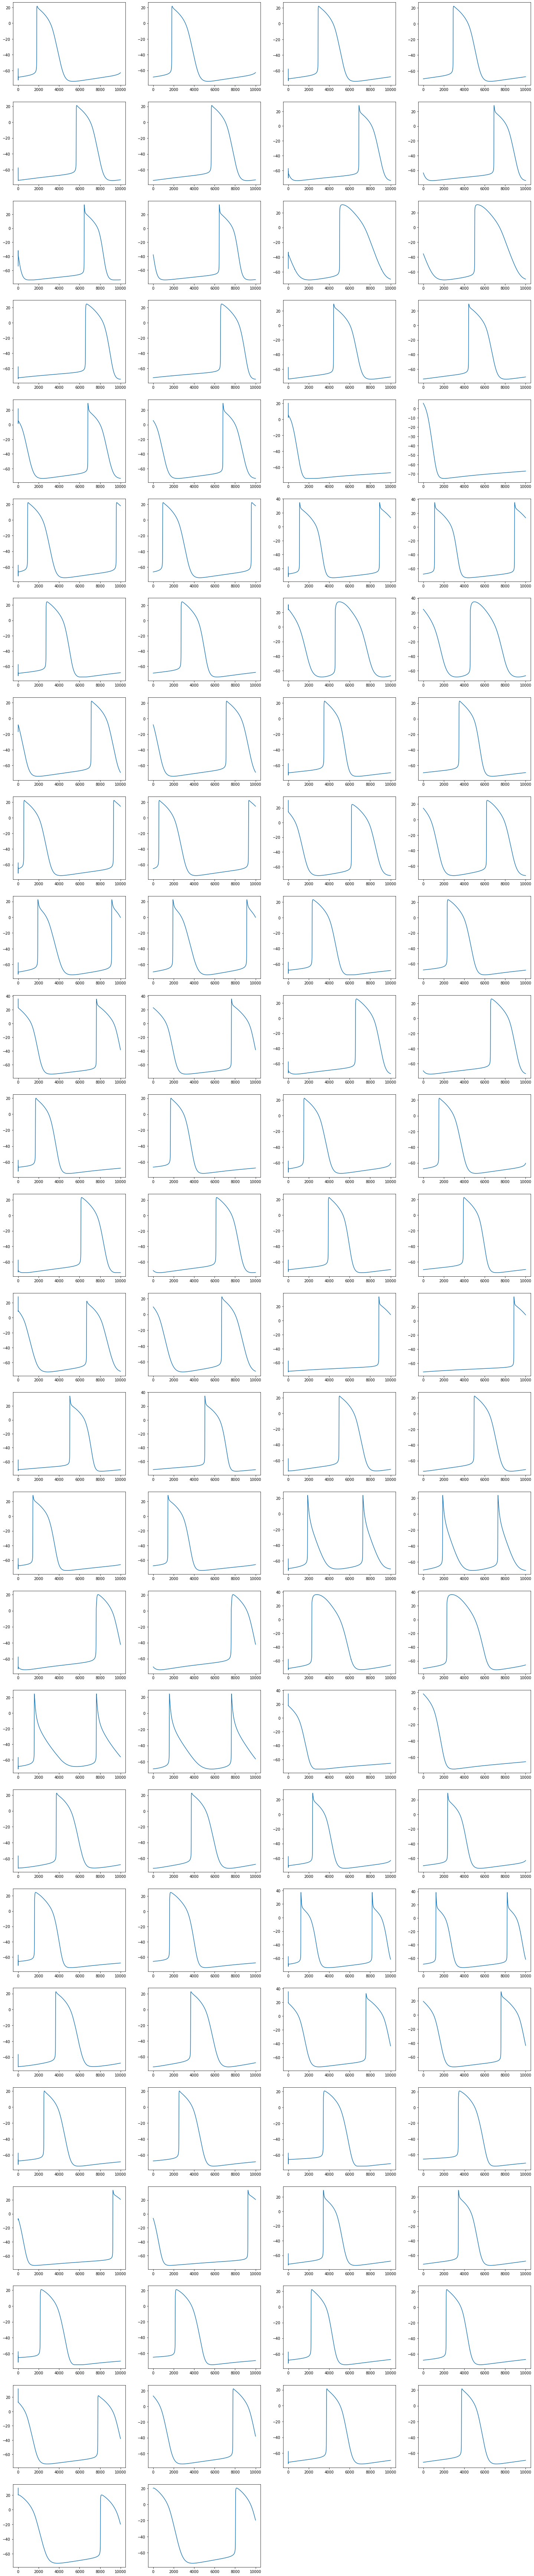

In [34]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    c = c + 1
    plt.subplot(a,b,c)
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

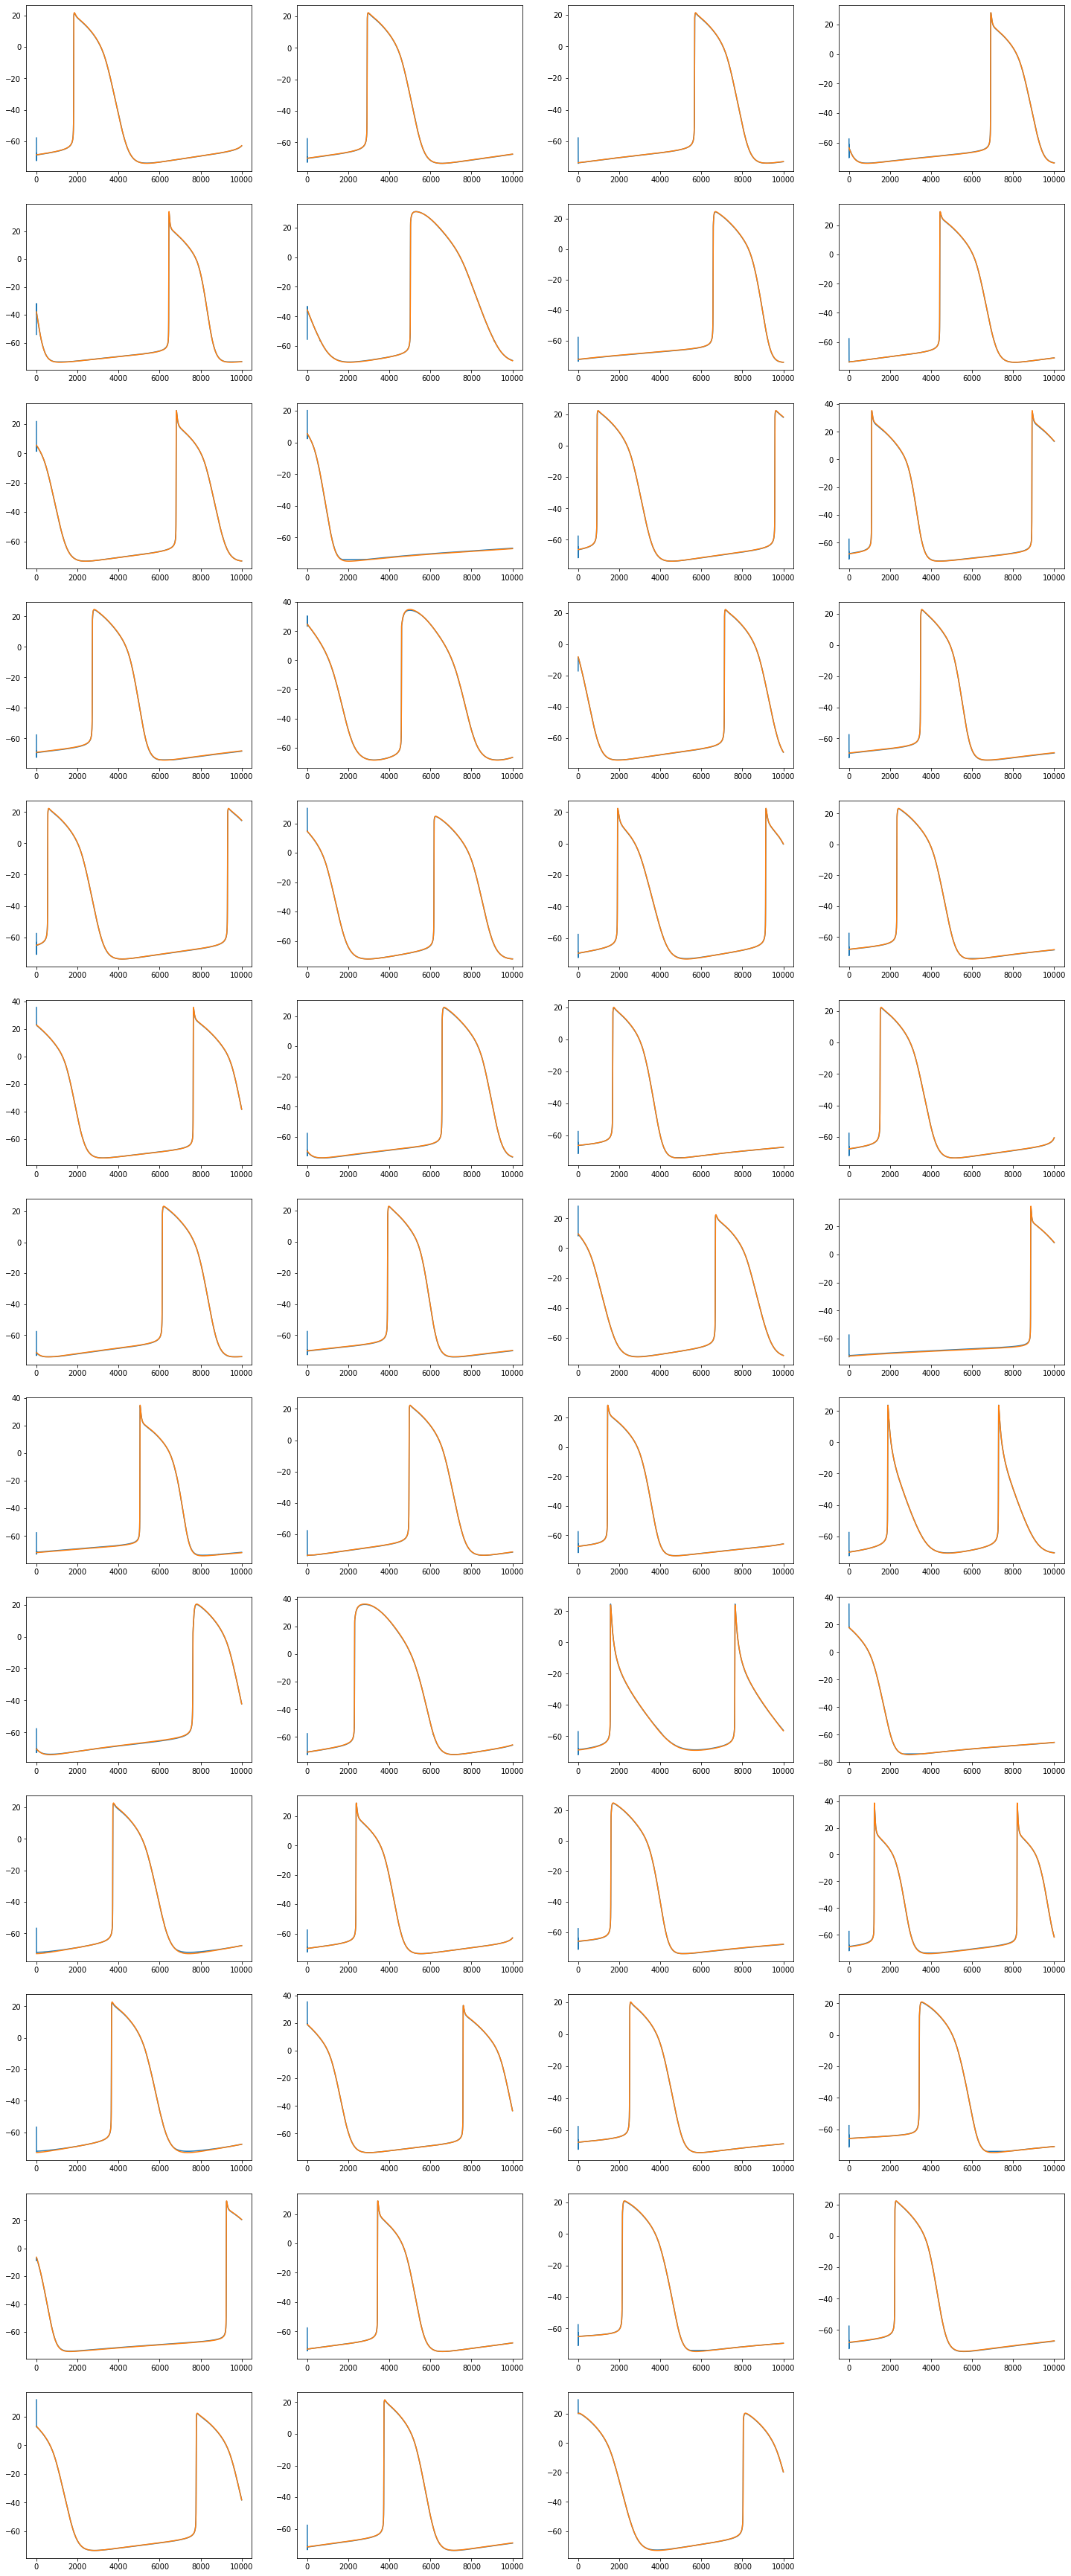

In [35]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [235]:
predicted2  = np.zeros([10000,1])
y_test2  = np.zeros([10000,1])
X_test2  = np.zeros([10000,6])
for i in range(predicted.shape[0]):
    y_t2 = np.round(y_test[i], decimals = 3)
    predic = np.round(predicted[i], decimals = 3)
    X_t2 = np.round(X_test[i], decimals = 5)
    y_test2 = np.append(y_test2 , y_t2, axis = 0)
    predicted2 = np.append(predicted2,predic, axis = 0)
    X_test2 = np.append(X_test2,X_t2, axis = 0)


print(y_test2.shape)
print(predicted2.shape)
y_test2 = y_test2.reshape((52,10000,1))
predicted2 = predicted2.reshape((52,10000,1))
y_test2 = np.delete(y_test2,0,0)
predicted2 = np.delete(predicted2,0,0)
X_test2 = X_test2.reshape((52,10000,6))
X_test2 = np.delete(X_test2,0,0)
# y_test2 = y_test2.reshape((510000,1))
# predicted2 = predicted2.reshape((510000,1))
# y_test2 = y_test2.reshape((51,10000,1))
# predicted2 = predicted2.reshape((51,10000,1))
print(y_test2.shape)
print(predicted2.shape)
print(X_test2.shape)
# print("accuracy score: ", accuracy_score(y_test2, predicted2))


(520000, 1)
(520000, 1)
(51, 10000, 1)
(51, 10000, 1)
(51, 10000, 6)


In [220]:
df_final = pd.DataFrame()
for i in range(51):
  df = pd.DataFrame(y_test2[i])
  df2 = pd.DataFrame(predicted2[i])
  df_final = pd.concat([df_final,df,df2],axis = 1)
df_final

0          0       0  ...          0       0          0
0    -68.451 -57.681000 -70.120  ... -57.695000  20.102  29.427000
1    -68.449 -70.988998 -70.118  ... -71.155998  20.115  28.113001
2    -68.447 -72.193001 -70.116  ... -73.051003  20.128  21.271000
3    -68.445 -71.864998 -70.115  ... -73.188004  20.140  20.530001
4    -68.443 -71.099998 -70.113  ... -73.087997  20.151  20.136000
...      ...        ...     ...  ...        ...     ...        ...
9995 -62.736 -62.814999 -67.493  ... -68.996002 -19.441 -19.517000
9996 -62.723 -62.801998 -67.491  ... -68.994003 -19.491 -19.568001
9997 -62.709 -62.787998 -67.489  ... -68.992996 -19.541 -19.618000
9998 -62.695 -62.773998 -67.487  ... -68.990997 -19.592 -19.669001
9999 -62.682 -62.759998 -67.485  ... -68.988998 -19.643 -19.719000

[10000 rows x 102 columns]

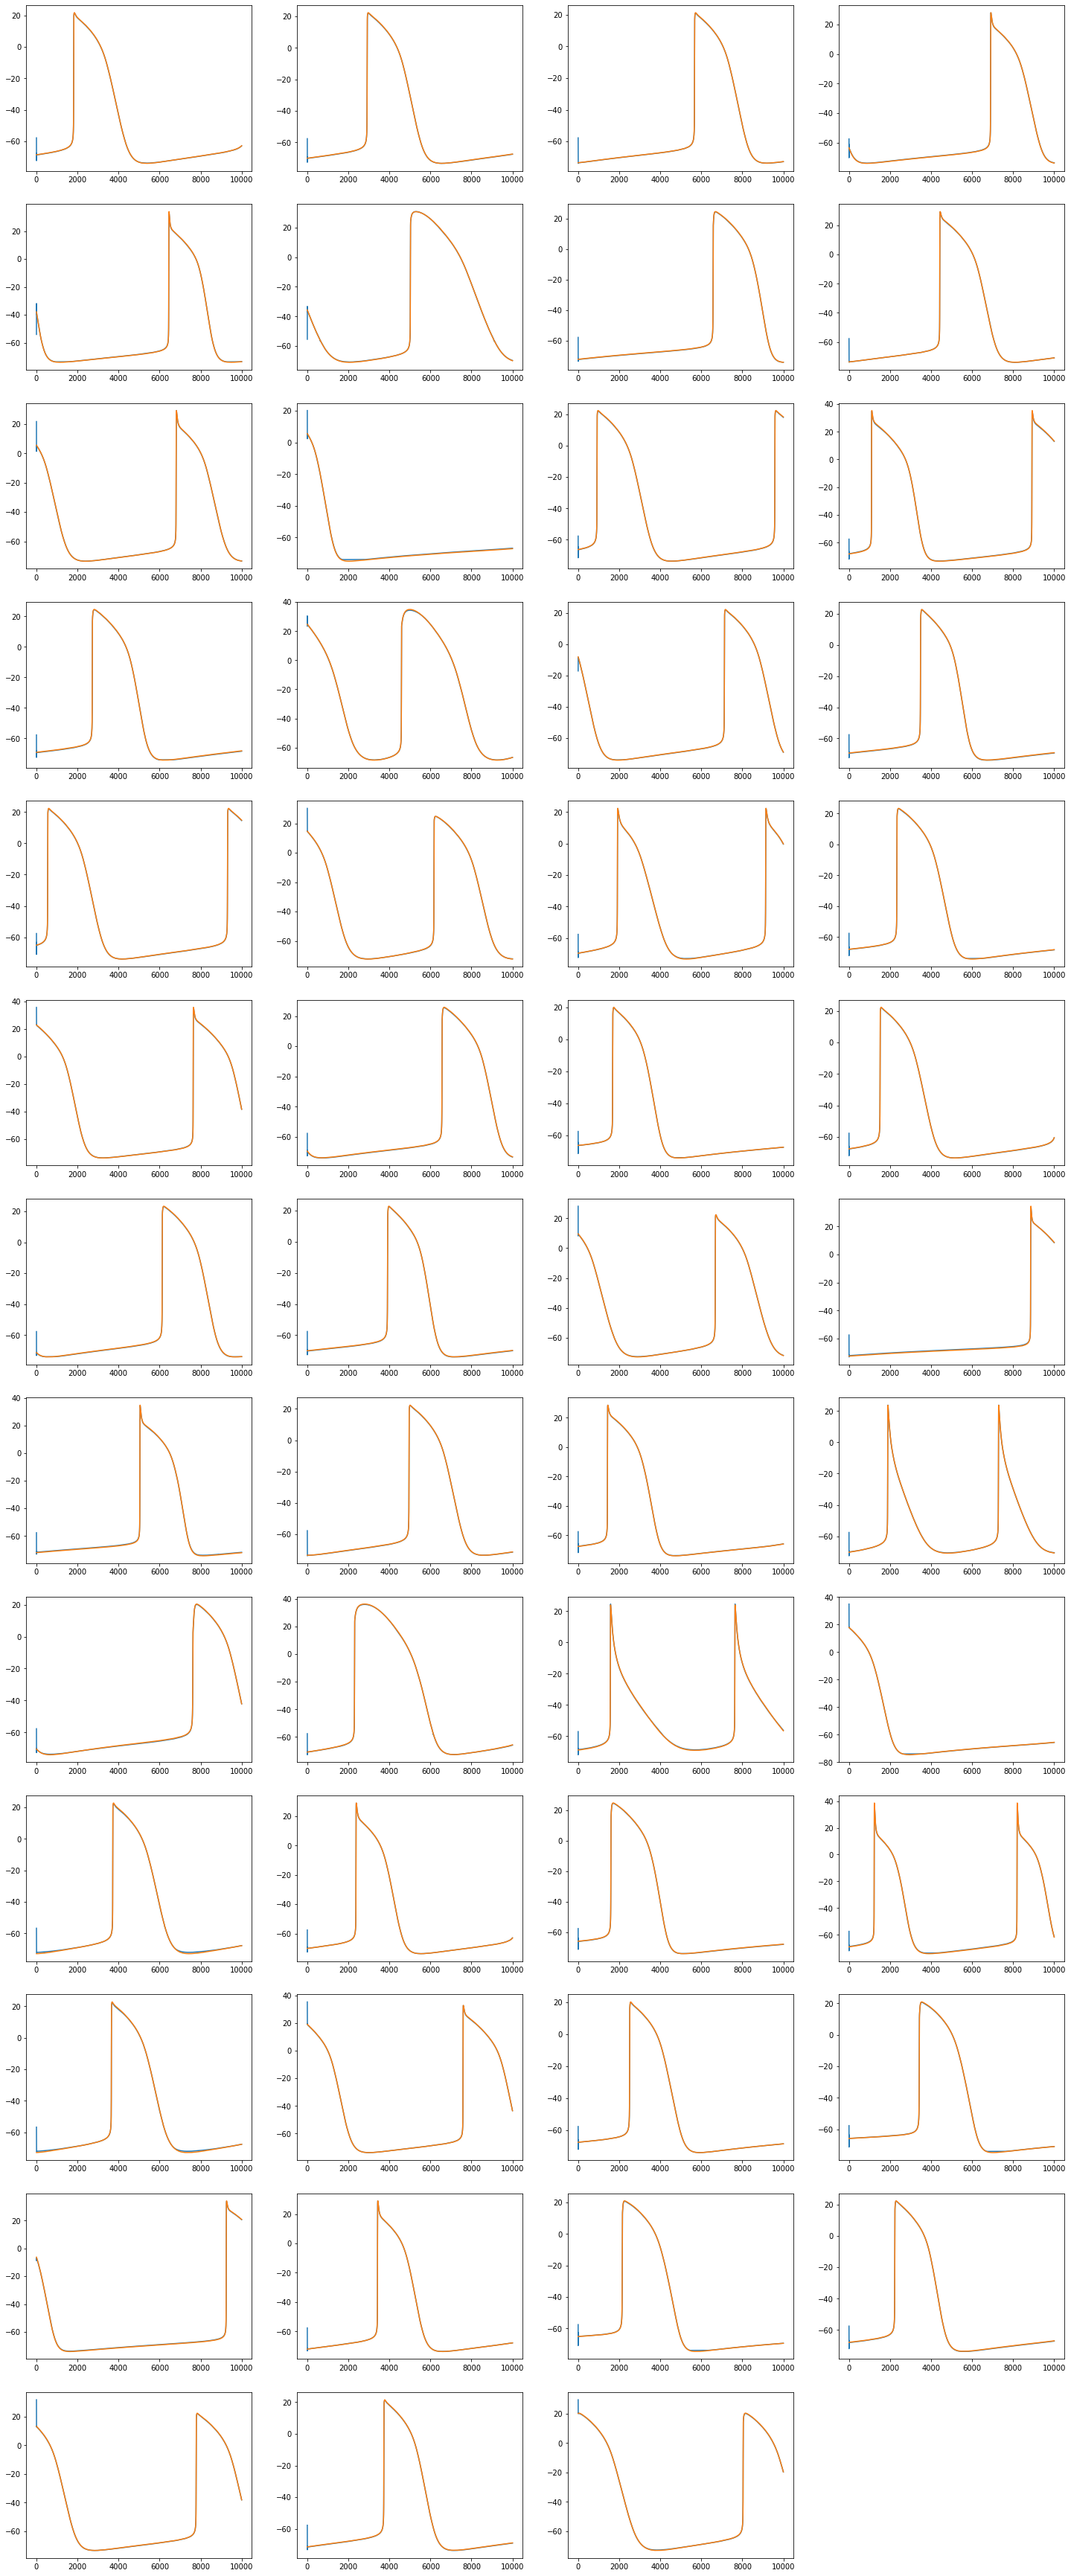

In [221]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted2.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted2[i])
    plt.plot(y_test2[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [241]:
predicted3  = np.zeros([9900,1])
y_test3  = np.zeros([9900,1])
for i in range(predicted.shape[0]):
  Y = y_test2[i]
  pre = predicted2[i]
  pre = pre[99:9999,:]
  Y = Y[99:9999:]
  y_test3 = np.append(y_test3, Y,  axis = 0)
  predicted3 = np.append(predicted3, pre, axis = 0)

print(y_test3.shape)
print(predicted3.shape)
y_test3 = y_test3.reshape((52,9900,1))
predicted3 = predicted3.reshape((52,9900,1))
y_test3 = np.delete(y_test3,0,0)
predicted3 = np.delete(predicted3,0,0)
print(y_test3.shape)
print(predicted3.shape)
# print("accuracy score: ", accuracy_score( y_test3, predicted3))

(514800, 1)
(514800, 1)
(51, 9900, 1)
(51, 9900, 1)


In [244]:
df_final = pd.DataFrame()
for i in range(51):
  df = pd.DataFrame(y_test3[i])
  df2 = pd.DataFrame(predicted3[i])
  df_final = pd.concat([df_final,df,df2],axis = 1)
df_final

0          0       0  ...          0       0          0
0    -68.254 -68.353996 -69.940  ... -71.308998  20.081  19.854000
1    -68.252 -68.351997 -69.938  ... -71.306999  20.074  19.847000
2    -68.250 -68.349998 -69.936  ... -71.305000  20.068  19.841000
3    -68.248 -68.348000 -69.934  ... -71.304001  20.062  19.834999
4    -68.246 -68.346001 -69.932  ... -71.302002  20.055  19.827999
...      ...        ...     ...  ...        ...     ...        ...
9895 -62.750 -62.828999 -67.495  ... -68.998001 -19.390 -19.466999
9896 -62.736 -62.814999 -67.493  ... -68.996002 -19.441 -19.517000
9897 -62.723 -62.801998 -67.491  ... -68.994003 -19.491 -19.568001
9898 -62.709 -62.787998 -67.489  ... -68.992996 -19.541 -19.618000
9899 -62.695 -62.773998 -67.487  ... -68.990997 -19.592 -19.669001

[9900 rows x 102 columns]

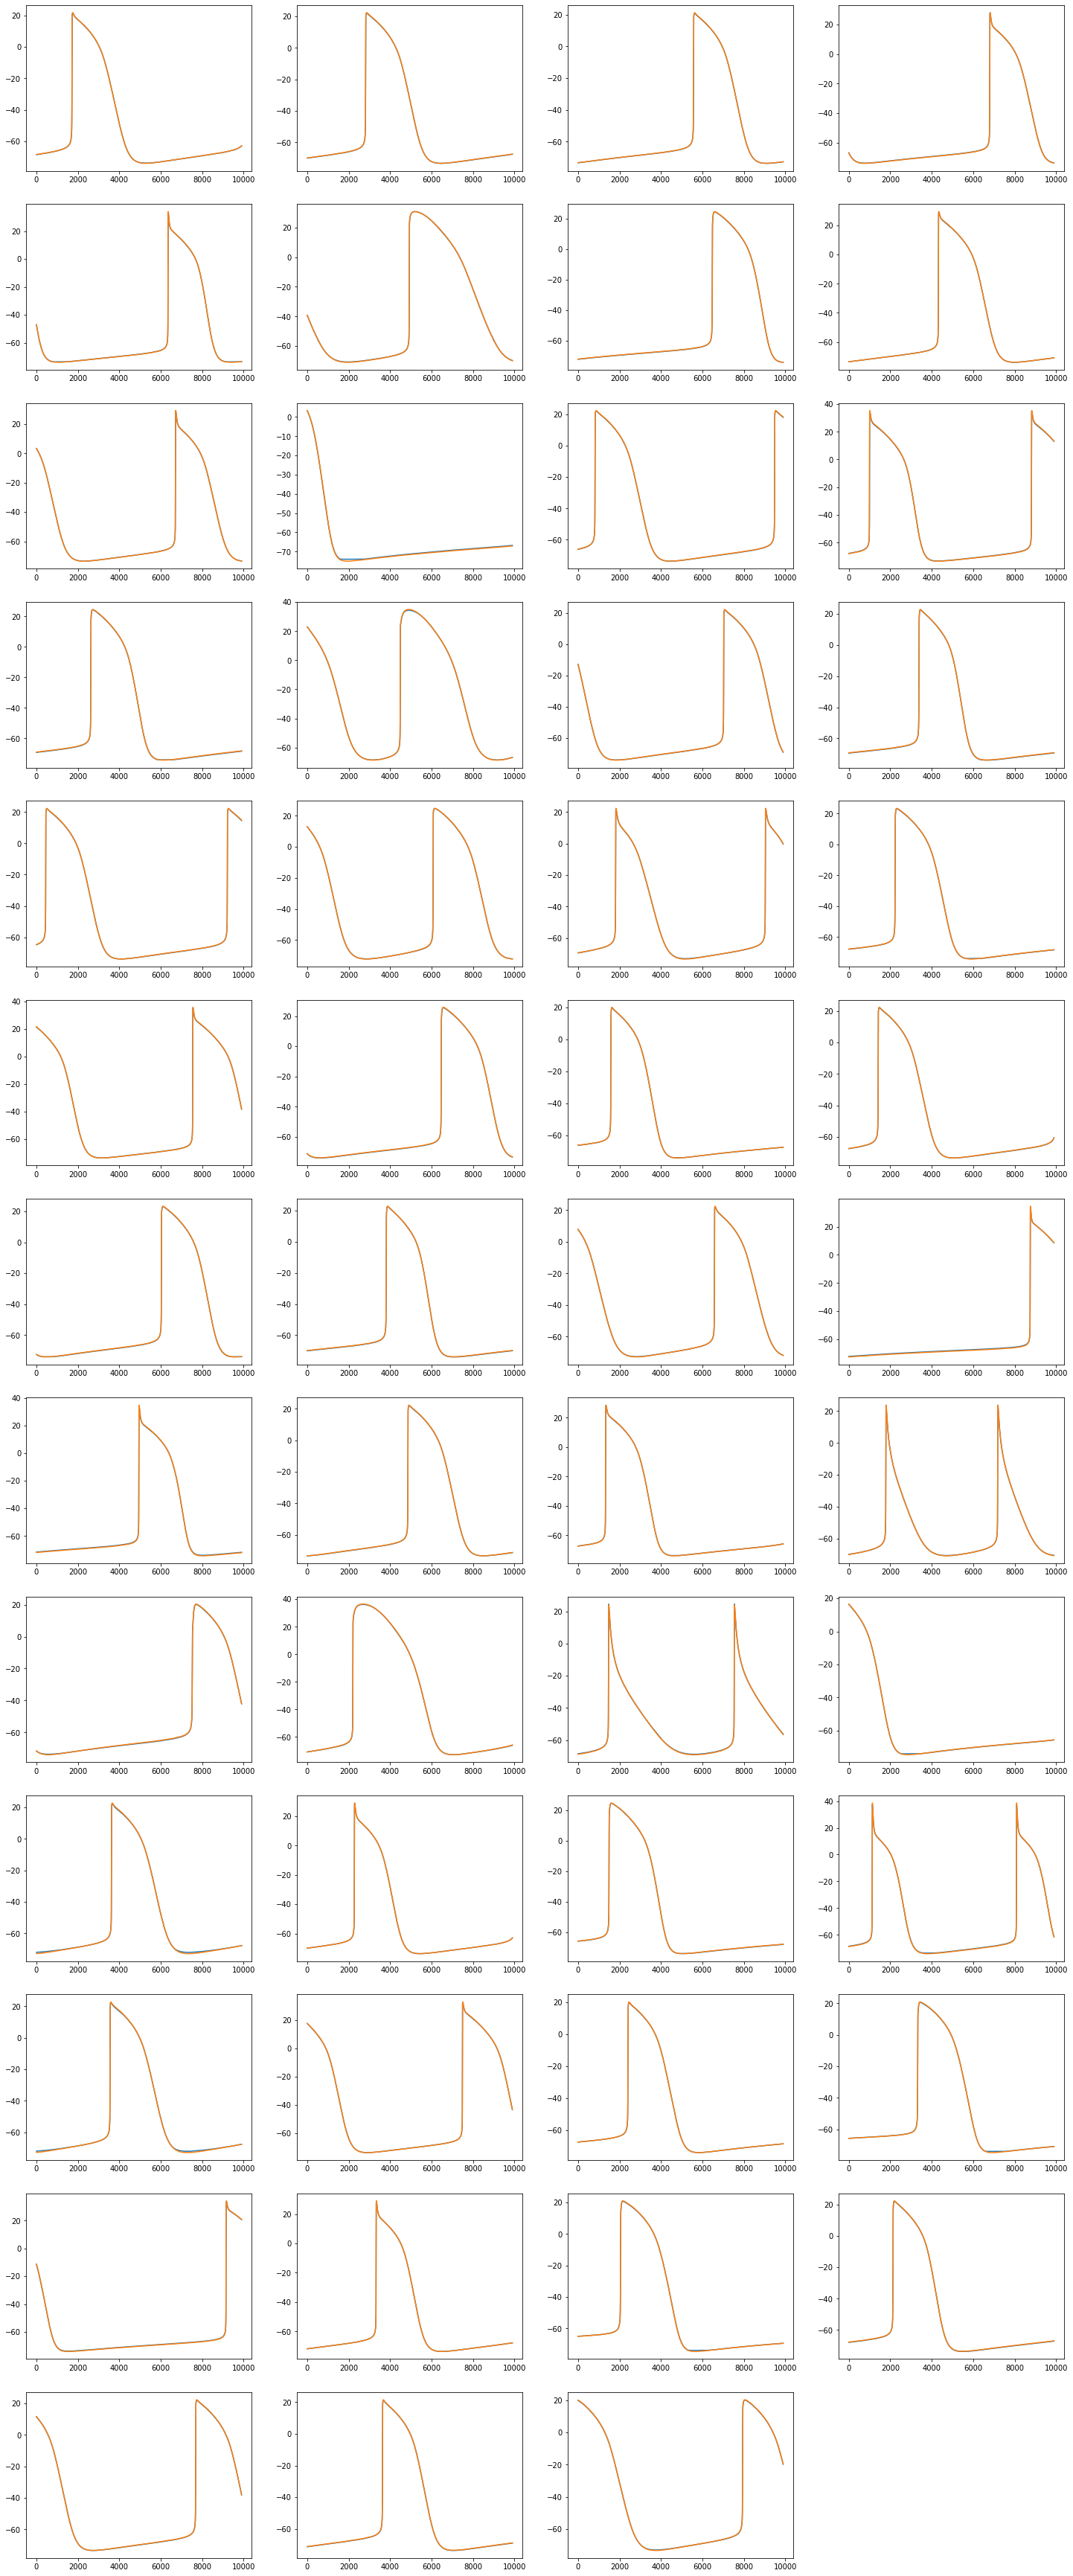

In [242]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted3.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted3[i])
    plt.plot(y_test3[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [44]:
model.save('Model_w_stop.h5')

In [236]:
from keras.models import load_model
# # load model
model = load_model('Model_w_stop.h5')

## **Model with 80 epochs**
hidenn = 20, 12

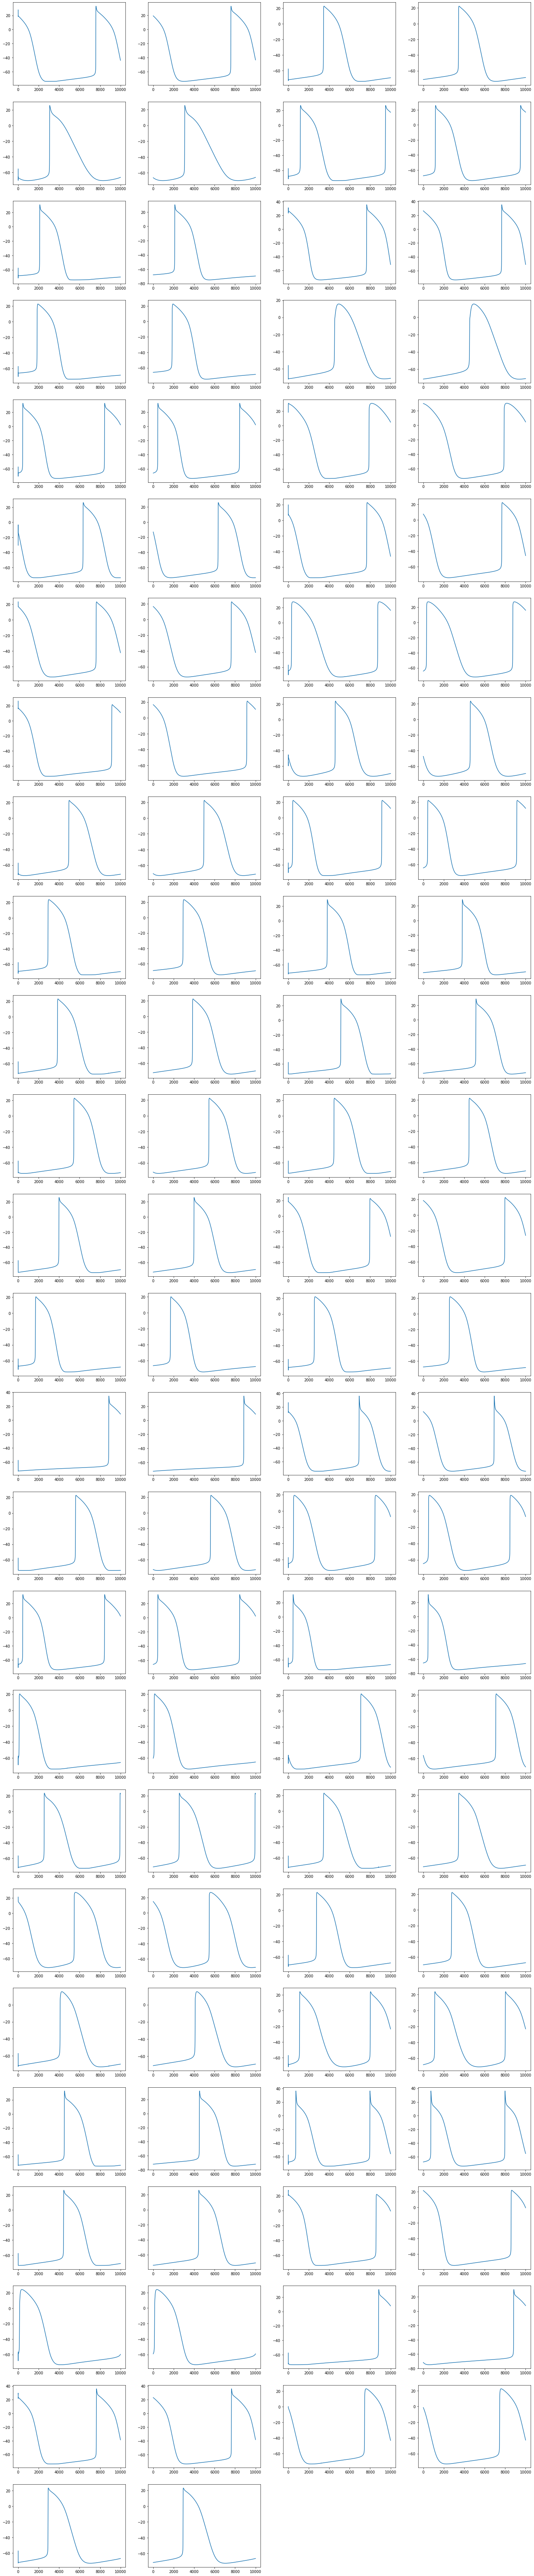

In [ ]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    c = c + 1
    plt.subplot(a,b,c)
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

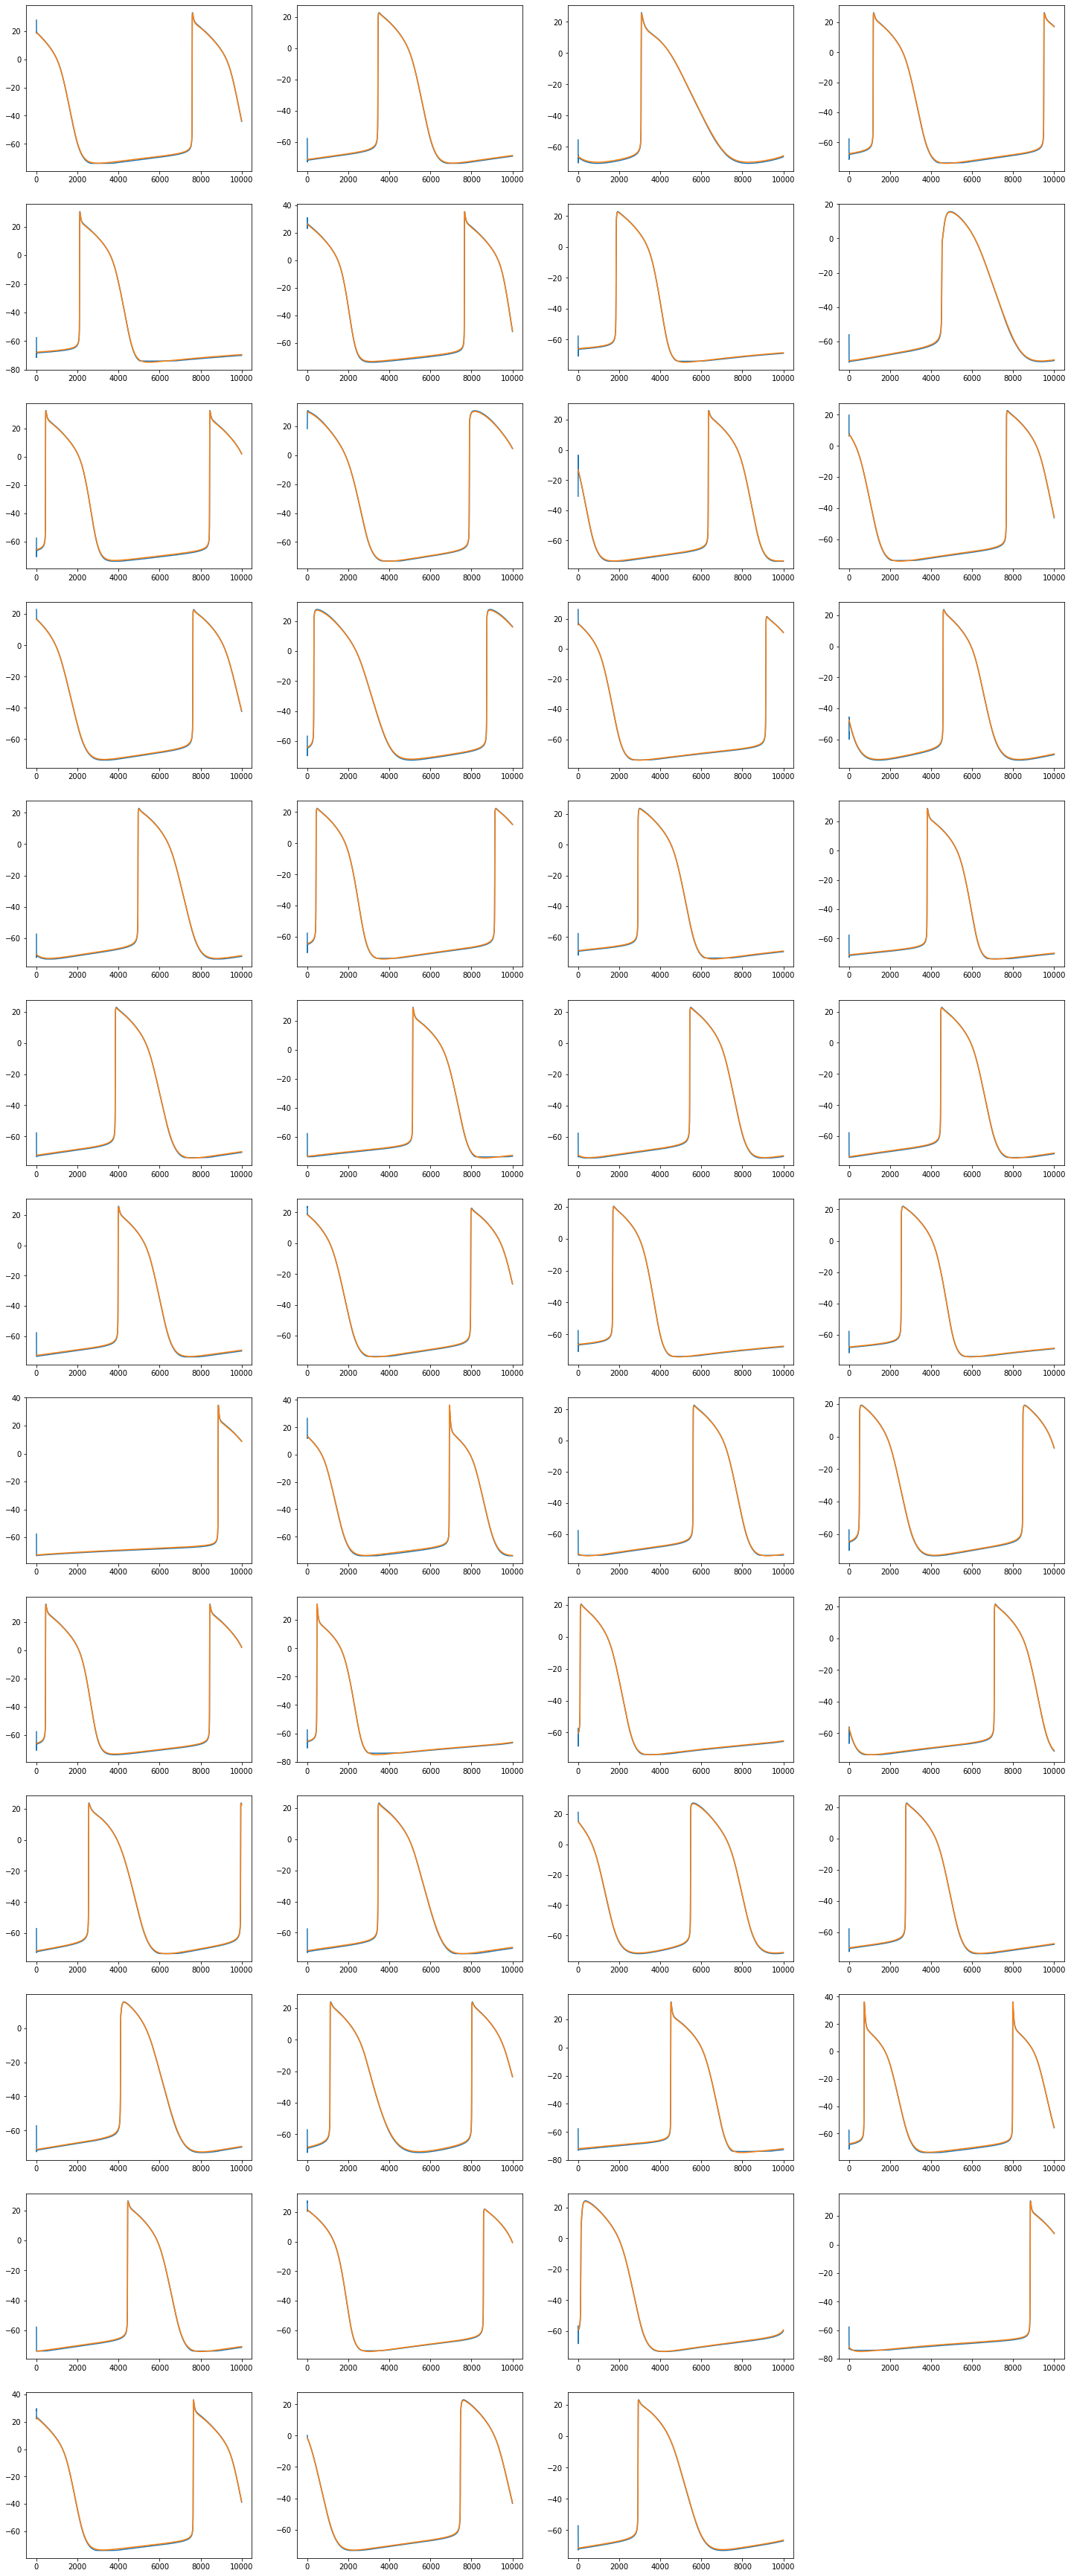

In [ ]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

0.23081624507904053

## **Model with 80 epochs**
hidenn = 20, 10

In [ ]:
#model hidden 20 and 10
model.fit(X_train, y_train, batch_size=16, epochs=80, validation_split=0.10)  


Epoch 1/80
26/26 [==============================] - 187s 7s/step - loss: 3529.9739 - val_loss: 3439.7656
Epoch 2/80
26/26 [==============================] - 185s 7s/step - loss: 3401.2595 - val_loss: 3303.6868
Epoch 3/80
26/26 [==============================] - 185s 7s/step - loss: 3270.2405 - val_loss: 3143.3479
Epoch 4/80
26/26 [==============================] - 187s 7s/step - loss: 3140.7317 - val_loss: 3062.7100
Epoch 5/80
26/26 [==============================] - 186s 7s/step - loss: 3014.5332 - val_loss: 2892.9558
Epoch 6/80
26/26 [==============================] - 191s 7s/step - loss: 2851.6536 - val_loss: 2763.1274
Epoch 7/80
26/26 [==============================] - 186s 7s/step - loss: 2751.8274 - val_loss: 2689.8535
Epoch 8/80
26/26 [==============================] - 186s 7s/step - loss: 2682.5627 - val_loss: 2621.2598
Epoch 9/80
26/26 [==============================] - 184s 7s/step - loss: 2614.6050 - val_loss: 2554.2041
Epoch 10/80
26/26 [==============================] - 18

In [ ]:
predicted = model.predict(X_test)  
print(predicted.shape)

(51, 10000, 1)


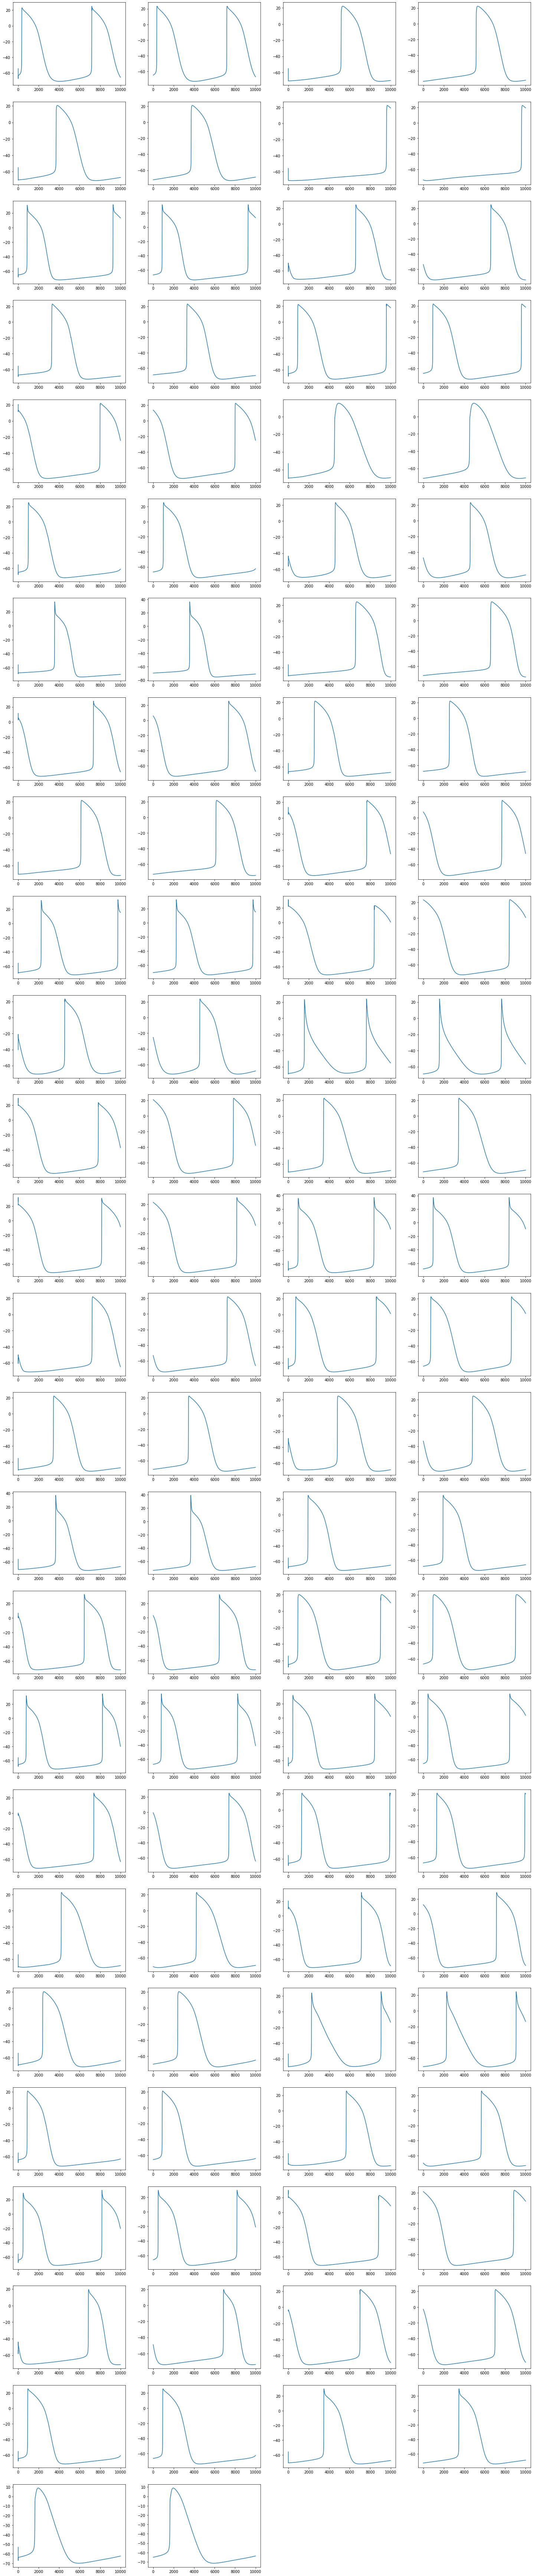

In [ ]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    c = c + 1
    plt.subplot(a,b,c)
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

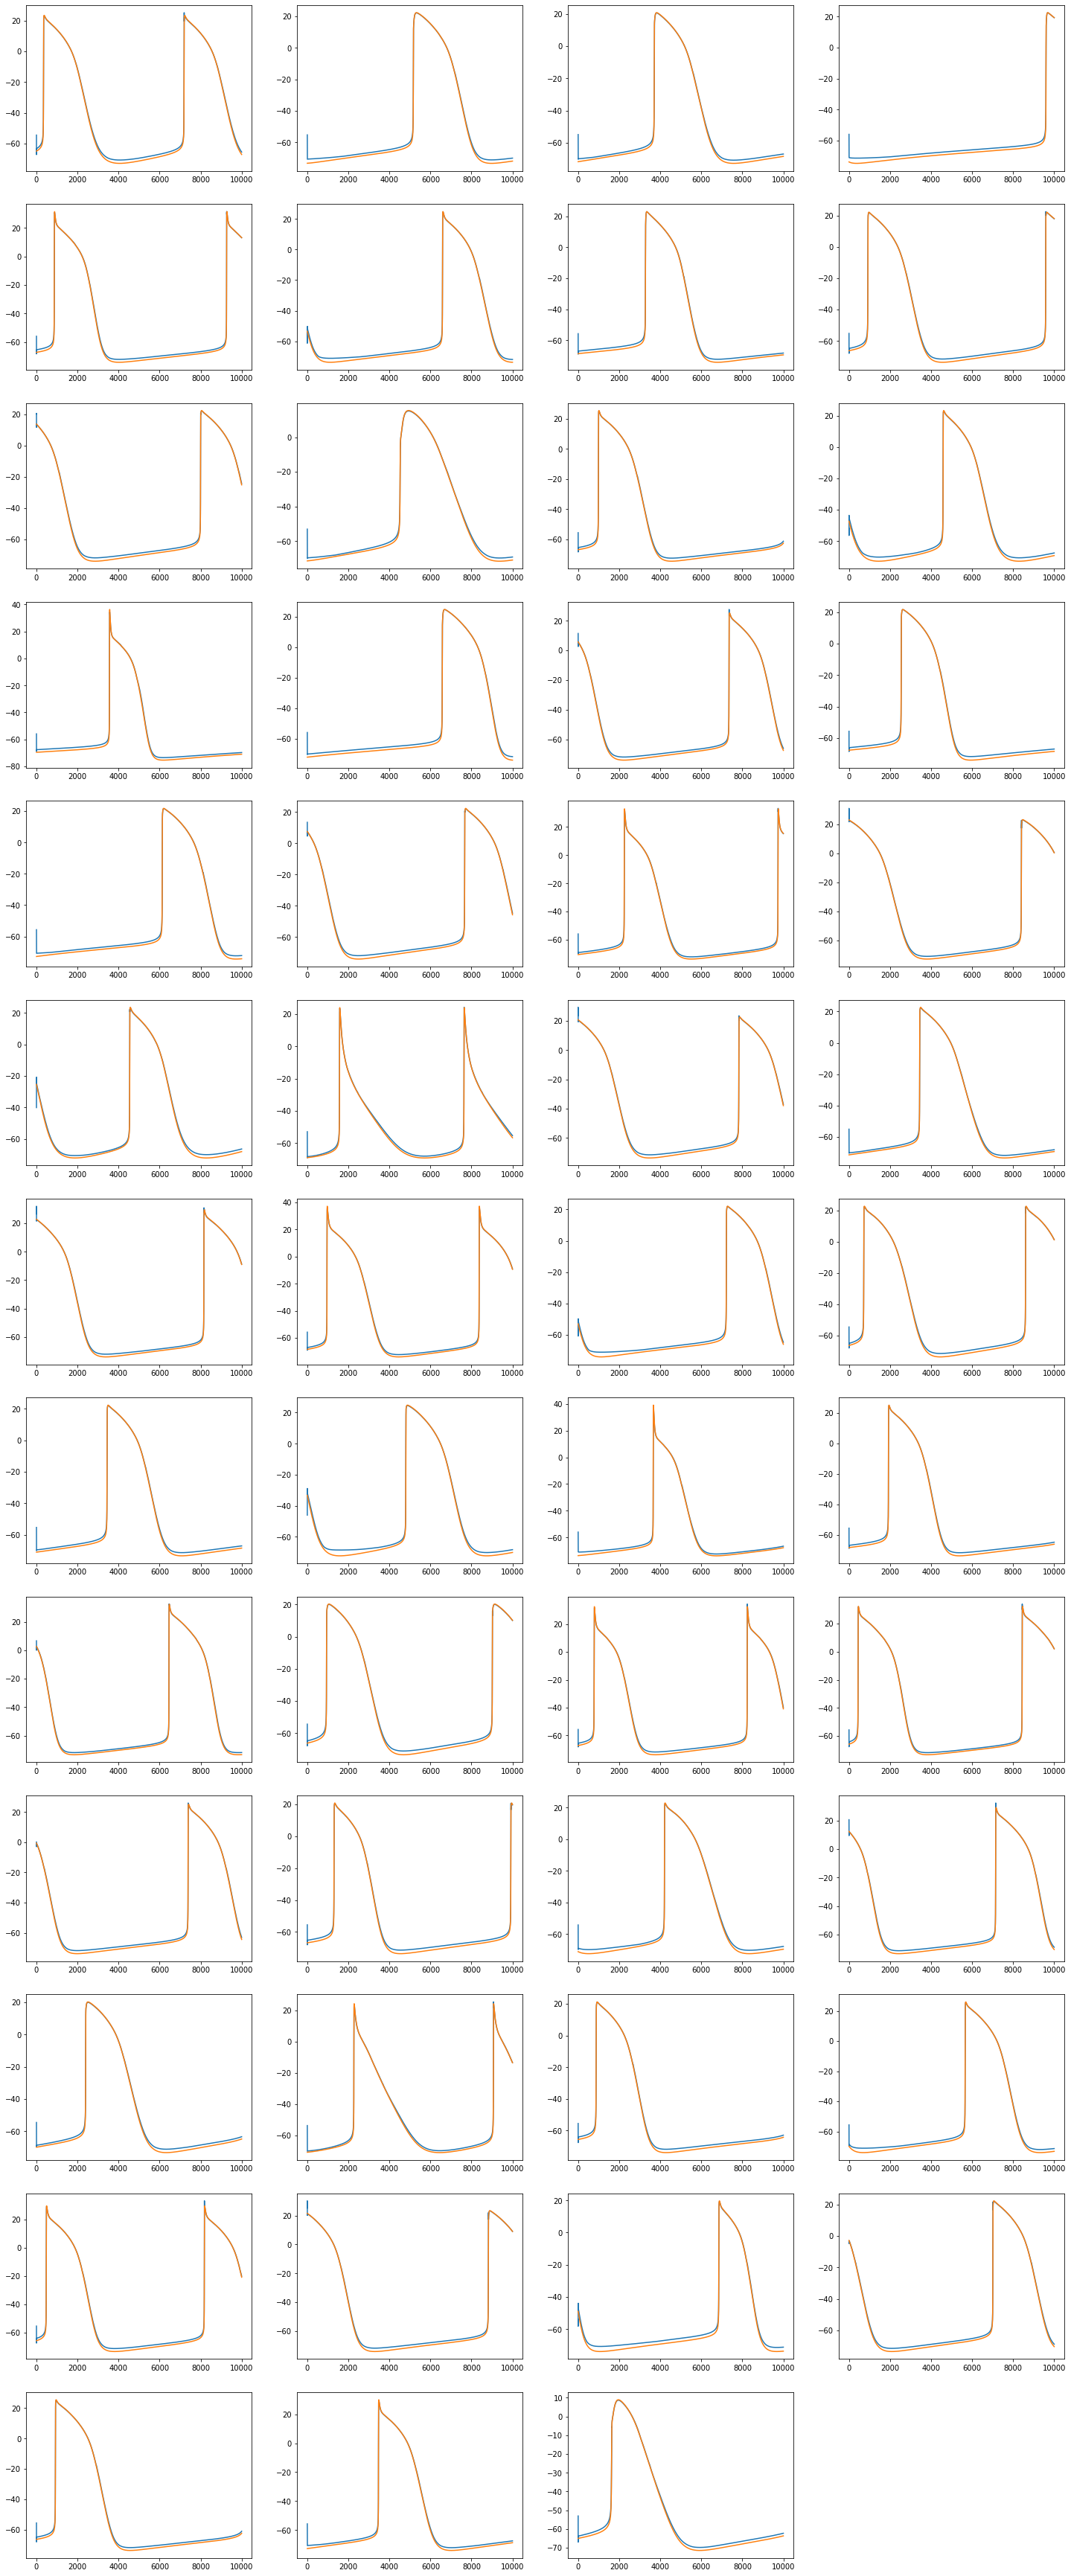

In [ ]:

fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

1.9742239713668823

## **Model with 50 epochs**
hidenn = 20, 10

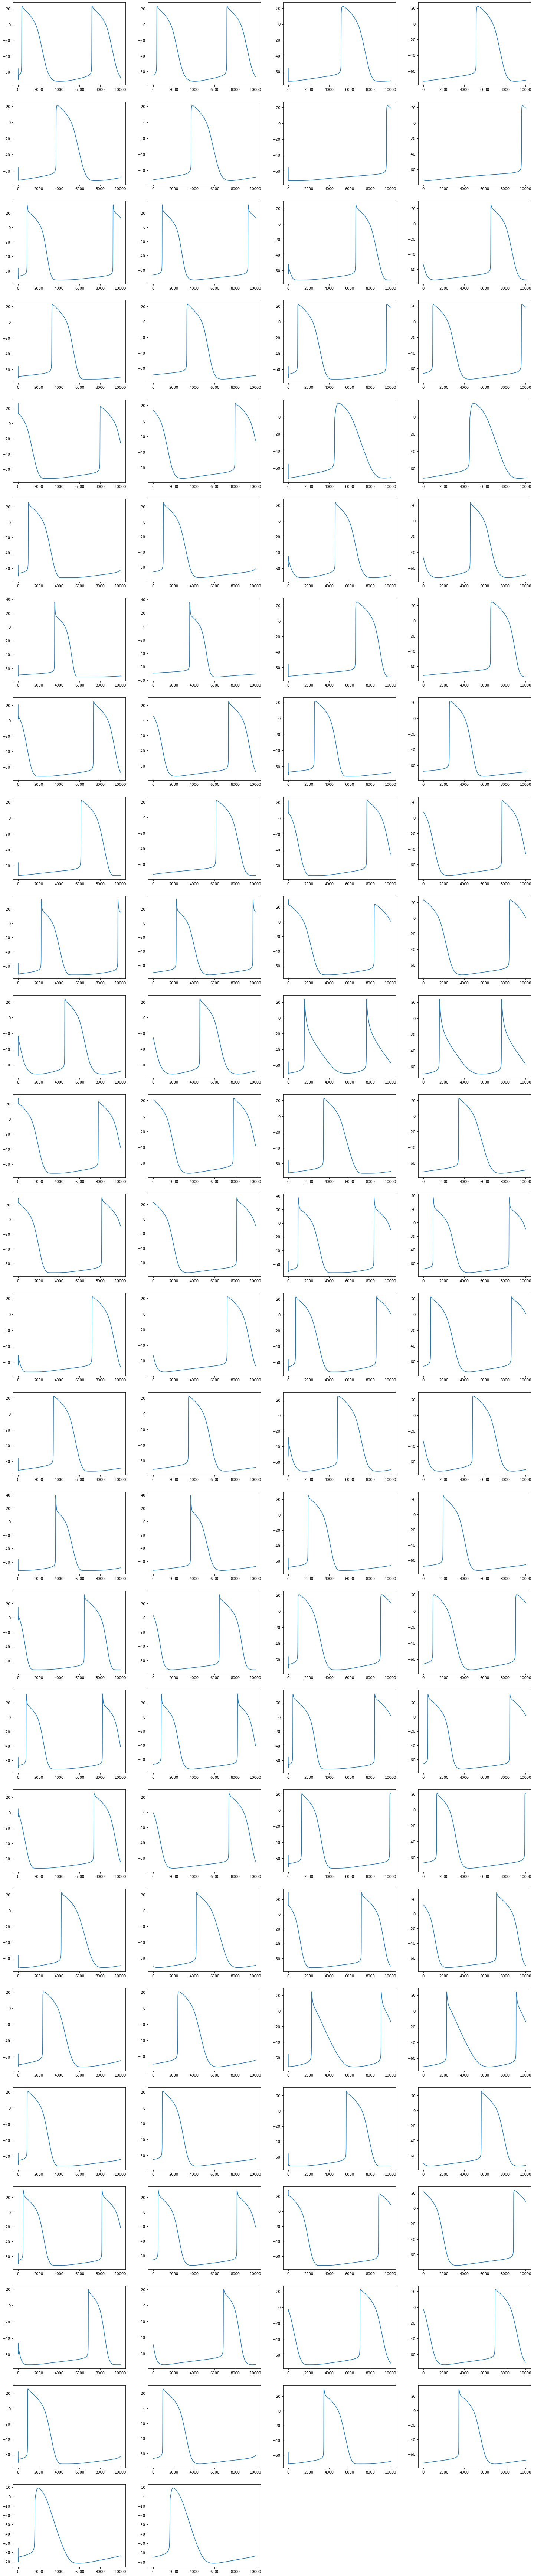

In [ ]:
fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    c = c + 1
    plt.subplot(a,b,c)
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

0.24835915863513947

In [ ]:
x1 = pd.DataFrame(predicted[6])
y1 = pd.DataFrame(y_test[6])
UU = pd.concat([x1,y1],axis=1)
UU

0          0
0    -56.204029 -68.673807
1    -69.417847 -68.672477
2    -71.095718 -68.671147
3    -71.070190 -68.669816
4    -70.681625 -68.668486
...         ...        ...
9995 -69.824844 -69.490193
9996 -69.823456 -69.488800
9997 -69.822060 -69.487408
9998 -69.820671 -69.486016
9999 -69.819275 -69.484624

[10000 rows x 2 columns]

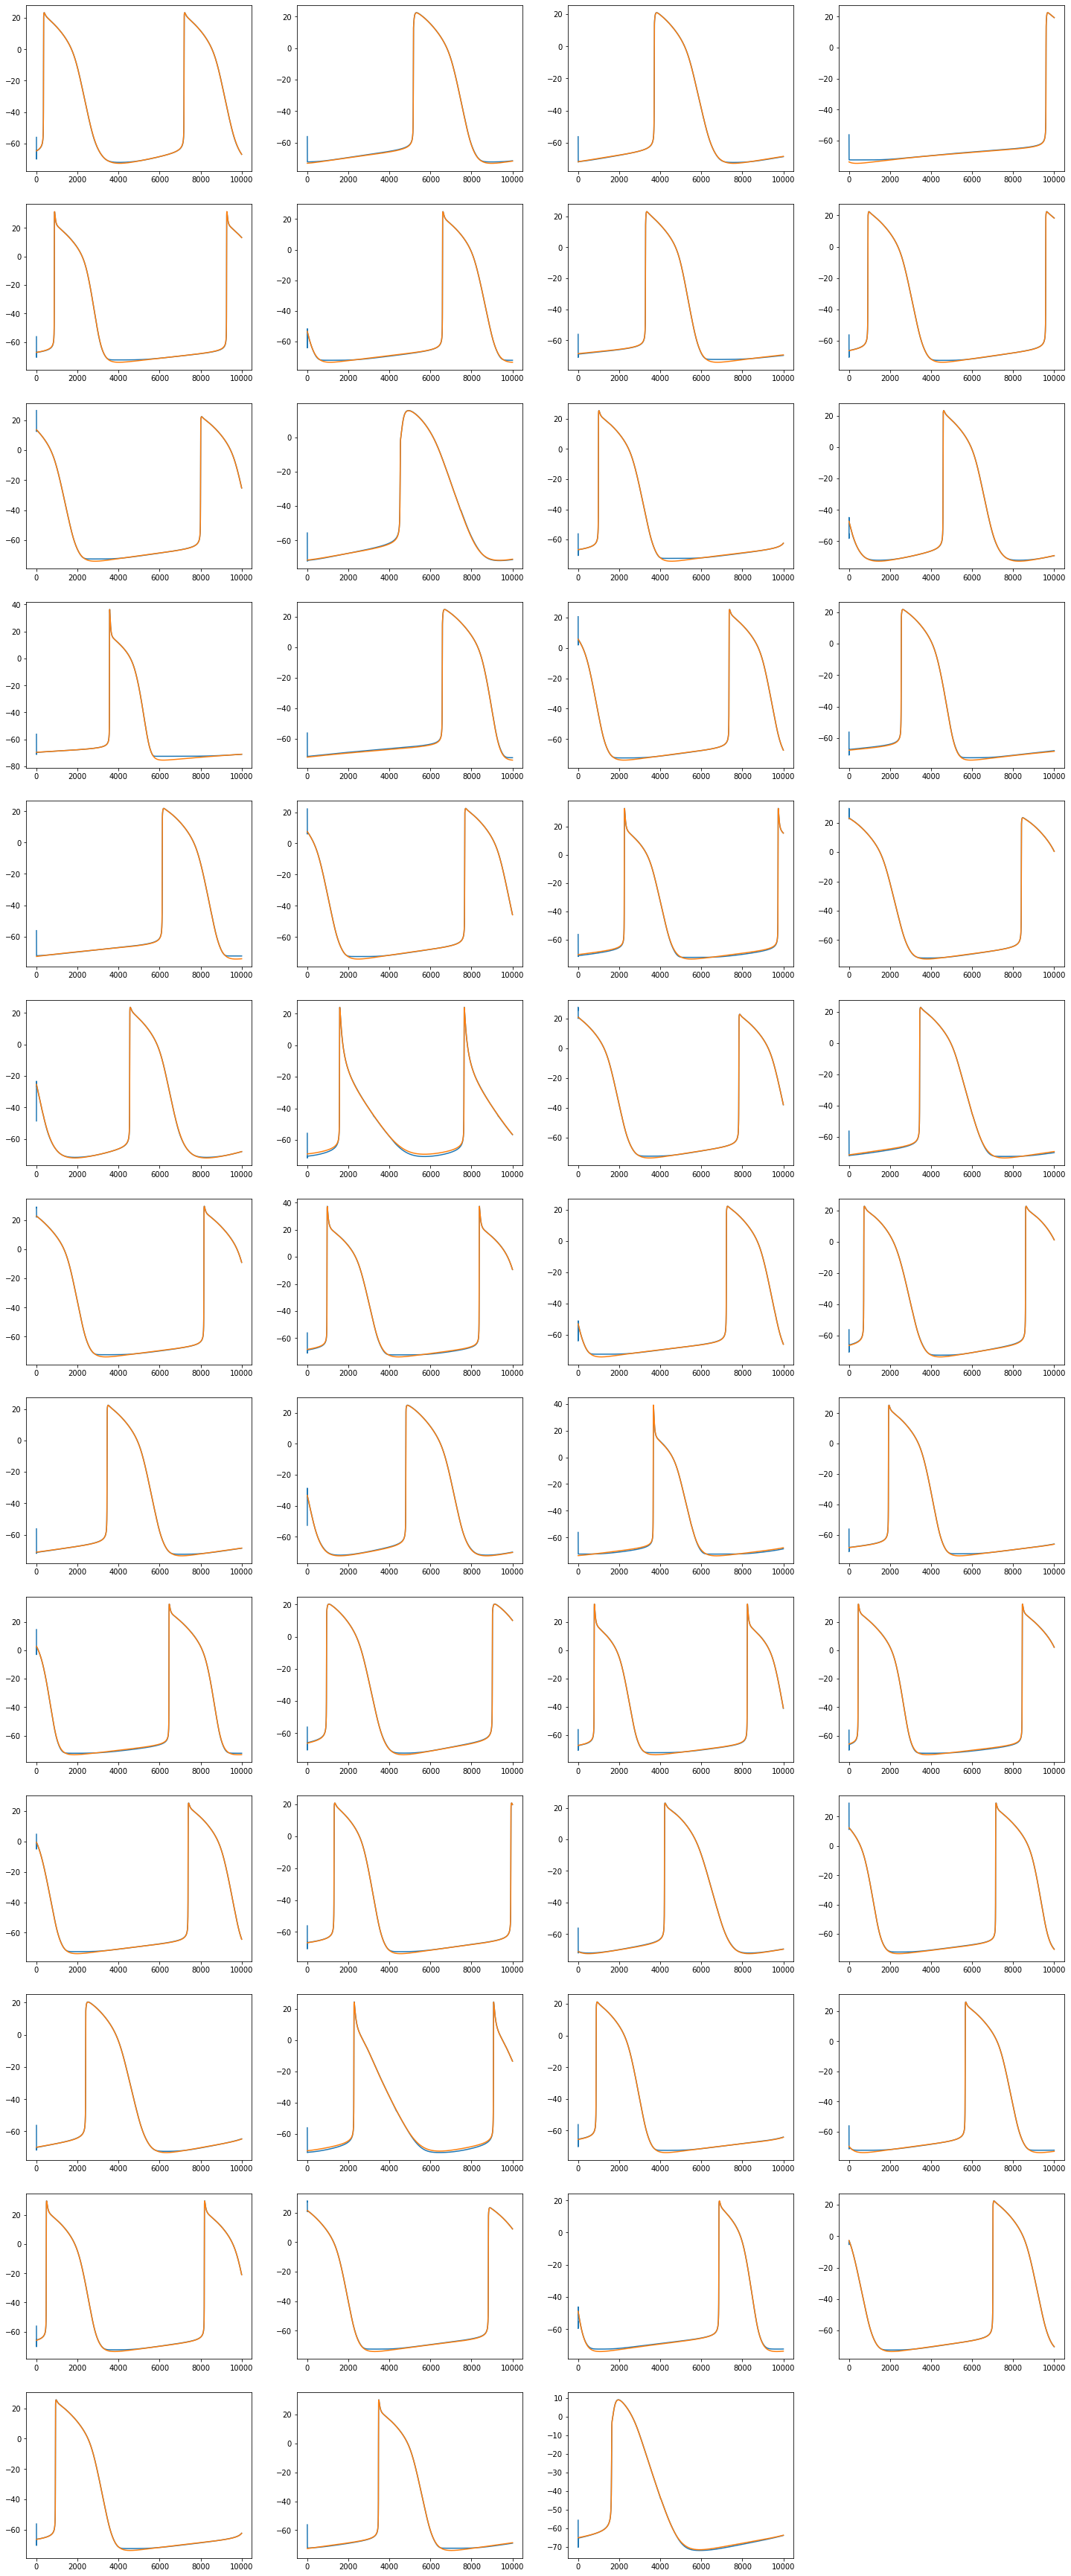

In [ ]:

fig = plt.figure(figsize = (25,250))
#  Categorical Data
a = 51  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.plot(predicted[i])
    plt.plot(y_test[i])
    #plt.title(title[i])
    c = c + 1
    
plt.show()